<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/%08BP_hv3_6(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
TensorFlow version :  2.8.2
Keras version :  2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러z오기
train_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/train_shuffled_raw_v3.mat')
test_data = io.loadmat('/content/gdrive/MyDrive/BP/hz/v3/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter

batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(4, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 512       
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 4)                 0

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 4s 6ms/step - loss: 12345.4434 - val_loss: 12431.1924
Epoch 2/500
165/165 [==============================] - 1s 4ms/step - loss: 12088.1250 - val_loss: 12055.9775
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 11783.0693 - val_loss: 11537.3691
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 11428.8955 - val_loss: 11073.6152
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 11026.3740 - val_loss: 10701.7256
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 10583.7959 - val_loss: 10217.6201
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 10113.2568 - val_loss: 9617.2568
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 9626.6426 - val_loss: 9114.3057
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 9136.7197 - val_loss: 8774.6064
Epoch 10/500
165/165 [==

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  2.8826824055011646 
MAE:  8.143562661878532 
SD:  10.563184915844335


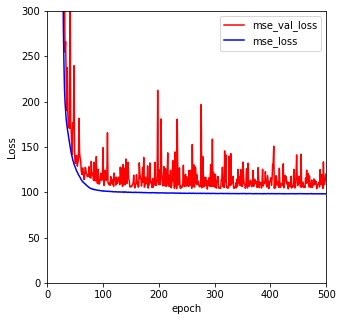

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(4, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 512       
                                                                 
 batch_normalization_2 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization_3 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 12514.9893 - val_loss: 12479.8828
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 12326.7656 - val_loss: 12127.9961
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 12106.3633 - val_loss: 11626.2744
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 11838.3076 - val_loss: 11549.4824
Epoch 5/500
165/165 [==============================] - 1s 4ms/step - loss: 11506.1084 - val_loss: 11132.8232
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 11065.9756 - val_loss: 10510.9697
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 10527.8838 - val_loss: 10859.6055
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 9927.9707 - val_loss: 9233.9639
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 9289.5947 - val_loss: 8012.9219
Epoch 10/500
165/165 [=

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -7.188603195901 
MAE:  10.412121373029496 
SD:  10.753876063165539


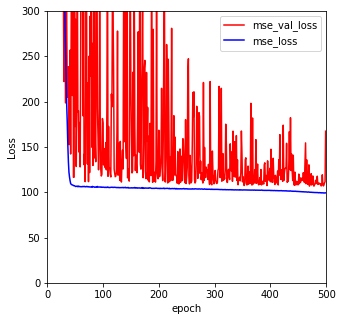

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(4, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 512       
                                                                 
 batch_normalization_4 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization_5 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 8ms/step - loss: 12332.6523 - val_loss: 12195.0586
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 12066.8291 - val_loss: 11955.8818
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 11750.1777 - val_loss: 11570.8447
Epoch 4/500
165/165 [==============================] - 1s 5ms/step - loss: 11365.5312 - val_loss: 11121.4775
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 10910.2227 - val_loss: 10378.1660
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 10381.6367 - val_loss: 9249.8730
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 9787.6846 - val_loss: 8555.4463
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 9154.2227 - val_loss: 8989.3027
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 8493.9883 - val_loss: 7335.3042
Epoch 10/500
165/165 [====

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.7743090149652305 
MAE:  7.9440614064125255 
SD:  10.572571386874142


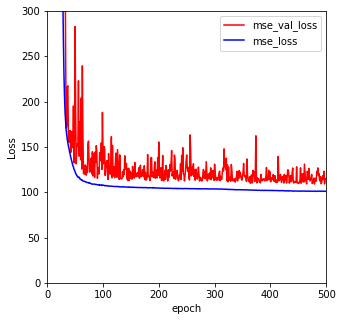

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.8438705918115348 
Ensemble_std:  10.629877455294672


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(4, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 512       
                                                                 
 batch_normalization_6 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 4)                 0         
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_7 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 5ms/step - loss: 3730.4468 - val_loss: 3678.5923
Epoch 2/500
165/165 [==============================] - 1s 5ms/step - loss: 3573.9336 - val_loss: 3498.1086
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 3410.6982 - val_loss: 3237.3137
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 3228.8743 - val_loss: 3013.3569
Epoch 5/500
165/165 [==============================] - 1s 4ms/step - loss: 3022.9600 - val_loss: 2771.4905
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 2796.4685 - val_loss: 2582.7705
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 2557.0698 - val_loss: 2281.8518
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 2312.6375 - val_loss: 1486.7318
Epoch 9/500
165/165 [==============================] - 1s 5ms/step - loss: 1959.4463 - val_loss: 1961.2330
Epoch 10/500
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.2781354197398882 
MAE:  4.766879101378069 
SD:  6.286530018583582


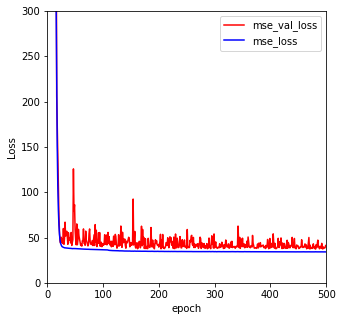

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(4, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 512       
                                                                 
 batch_normalization_8 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 4)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_9 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 2s 6ms/step - loss: 3764.2141 - val_loss: 3694.3306
Epoch 2/500
165/165 [==============================] - 1s 4ms/step - loss: 3661.9976 - val_loss: 3700.9519
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 3537.0742 - val_loss: 3454.8870
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 3373.5498 - val_loss: 3218.9688
Epoch 5/500
165/165 [==============================] - 1s 5ms/step - loss: 3150.0125 - val_loss: 2832.8176
Epoch 6/500
165/165 [==============================] - 1s 5ms/step - loss: 2867.6333 - val_loss: 2578.3403
Epoch 7/500
165/165 [==============================] - 1s 5ms/step - loss: 2543.5654 - val_loss: 2561.7668
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 2168.9810 - val_loss: 1854.8927
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 1805.5693 - val_loss: 1723.5214
Epoch 10/500
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  0.9180317788534591 
MAE:  4.4447236416404685 
SD:  6.043288344910288


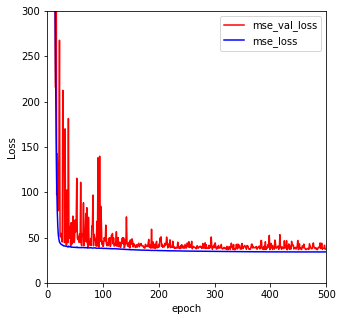

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(4, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))
    
    
    return model

In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 512       
                                                                 
 batch_normalization_10 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 4)                 0         
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_11 (Bat  (None, 4)                16        
 chNormalization)                                                
                                                                 
 activation_11 (Activation)  (None, 4)                

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
165/165 [==============================] - 1s 5ms/step - loss: 3781.5947 - val_loss: 3716.6101
Epoch 2/500
165/165 [==============================] - 1s 4ms/step - loss: 3673.5249 - val_loss: 3567.6921
Epoch 3/500
165/165 [==============================] - 1s 5ms/step - loss: 3523.2622 - val_loss: 3413.7961
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 3330.7498 - val_loss: 3246.5269
Epoch 5/500
165/165 [==============================] - 1s 4ms/step - loss: 3099.1008 - val_loss: 3040.8513
Epoch 6/500
165/165 [==============================] - 1s 4ms/step - loss: 2834.3518 - val_loss: 2967.2896
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 2550.8032 - val_loss: 2076.1421
Epoch 8/500
165/165 [==============================] - 1s 4ms/step - loss: 2261.4348 - val_loss: 1963.8567
Epoch 9/500
165/165 [==============================] - 1s 4ms/step - loss: 1973.7756 - val_loss: 1311.8853
Epoch 10/500
165/165 [===============

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.6754803433639762 
MAE:  4.651615714009073 
SD:  6.210757359635859


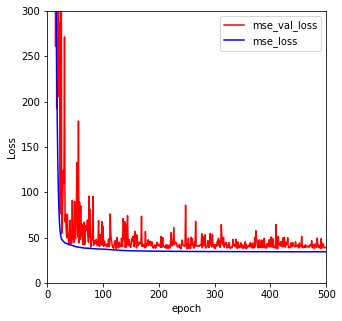

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.3451946614168018 
Ensemble_std:  6.180191907709911
